In [1]:
## Create Synth Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples= 1000, n_features= 2, n_redundant=0, n_clusters_per_class=1, weights= [0.5, 0.5], flip_y= 0, random_state= 1)

In [4]:
##plotting the data

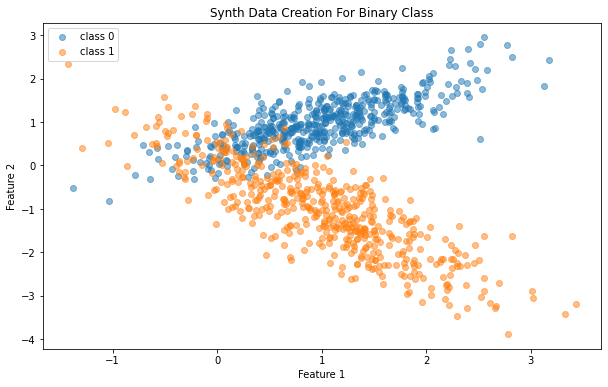

In [5]:
plt.figure(figsize = (10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label = 'class 0', alpha = 0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label = 'class 1', alpha = 0.5)
plt.title('Synth Data Creation For Binary Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

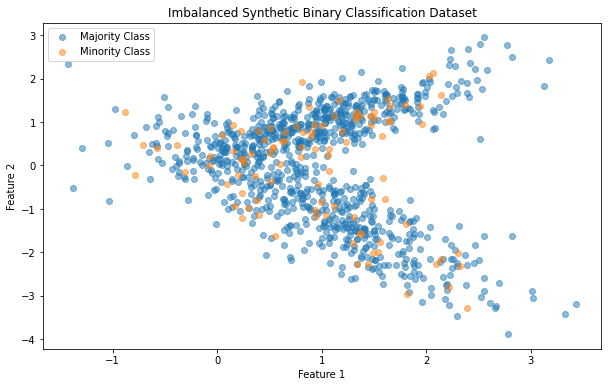

In [6]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

def create_imbalanced_dataset(n_samples=1000, imbalance_ratio=0.1):
    """
    Creates an imbalanced binary classification dataset.

    Parameters:
    - n_samples: Total number of samples (instances) in the dataset.
    - imbalance_ratio: The proportion of the minority class in the dataset.
                       For example, 0.1 means 10% of samples belong to the minority class
                       and 90% to the majority class.

    Returns:
    - X: Feature array with shape (n_samples, n_features).
    - y: Target array with shape (n_samples,).
    """
    minority_samples = int(n_samples * imbalance_ratio)
    majority_samples = n_samples - minority_samples

    # Create a balanced dataset
    X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.5], flip_y=0, random_state=1)

    # Make the dataset imbalanced
    y[:majority_samples] = 0  # Majority class
    y[majority_samples:] = 1  # Minority class

    return X, y

# Example usage
X_imbalanced, y_imbalanced = create_imbalanced_dataset(n_samples=1000, imbalance_ratio=0.1)

# Plotting the imbalanced dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_imbalanced[y_imbalanced == 0][:, 0], X_imbalanced[y_imbalanced == 0][:, 1], label="Majority Class", alpha=0.5)
plt.scatter(X_imbalanced[y_imbalanced == 1][:, 0], X_imbalanced[y_imbalanced == 1][:, 1], label="Minority Class", alpha=0.5)
plt.title("Imbalanced Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

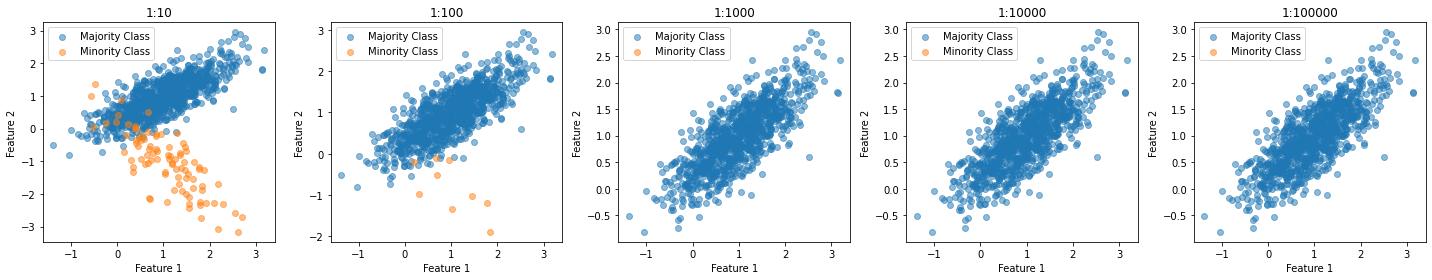

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def plot_imbalanced_datasets(ratios, n_samples=1000):
    """
    Plots imbalanced datasets for given minority class ratios.

    Parameters:
    - ratios: A list of tuples representing the desired minority class ratios (e.g., [(1, 10), (1, 100)]).
    - n_samples: Total number of samples in each dataset.
    """
    fig, axs = plt.subplots(1, len(ratios), figsize=(20, 4))

    for ax, ratio in zip(axs, ratios):
        minority_ratio = ratio[0] / sum(ratio)
        X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0,
                                   n_clusters_per_class=1, weights=[1-minority_ratio], flip_y=0, random_state=1)

        # Plotting
        ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Majority Class", alpha=0.5)
        ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Minority Class", alpha=0.5)
        ax.set_title(f"1:{ratio[1]}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Define the desired ratios
ratios = [(1, 10), (1, 100), (1, 1000), (1, 10000), (1, 100000)]

# Plot the imbalanced datasets
plot_imbalanced_datasets(ratios)